Design and Implement Multi-Layer Perceptron for MNIST Dataset with below requirements
Display total number of data with classes
Follow 70:30 Split ratio
Learning rate: 0.4
Optimizer of your choice
Use Minimum 3 hidden layers and Minimum 15 epochs
Display training and validation loss graph


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import pandas as pd

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

class_counts = pd.Series([label for _, label in mnist_dataset]).value_counts().sort_index()
print("Total number of data with classes:\n", class_counts)

100%|██████████| 9.91M/9.91M [00:00<00:00, 52.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.86MB/s]


Total number of data with classes:
 0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


In [3]:
train_size = int(0.7 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.4)

In [5]:
train_losses = []
val_losses = []
epochs = 15

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

Epoch 1/15, Train Loss: 2.2993, Val Loss: 2.3041
Epoch 2/15, Train Loss: 2.3026, Val Loss: 2.3024
Epoch 3/15, Train Loss: 2.3027, Val Loss: 2.3021
Epoch 4/15, Train Loss: 2.3026, Val Loss: 2.3020
Epoch 5/15, Train Loss: 2.3026, Val Loss: 2.3013
Epoch 6/15, Train Loss: 2.3029, Val Loss: 2.3018
Epoch 7/15, Train Loss: 2.3024, Val Loss: 2.3039
Epoch 8/15, Train Loss: 2.3025, Val Loss: 2.3028
Epoch 9/15, Train Loss: 2.3027, Val Loss: 2.3039
Epoch 10/15, Train Loss: 2.3027, Val Loss: 2.3032
Epoch 11/15, Train Loss: 2.3026, Val Loss: 2.3014
Epoch 12/15, Train Loss: 2.3025, Val Loss: 2.3048
Epoch 13/15, Train Loss: 2.3027, Val Loss: 2.3038
Epoch 14/15, Train Loss: 2.3027, Val Loss: 2.3037
Epoch 15/15, Train Loss: 2.3027, Val Loss: 2.3042


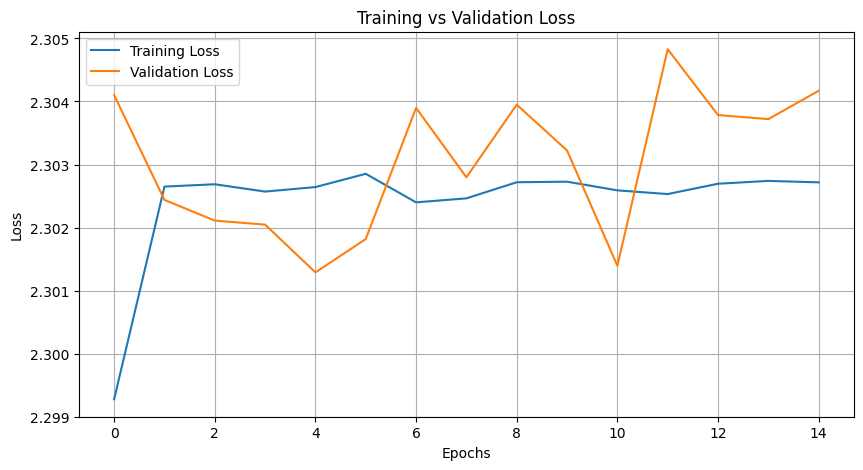

In [6]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()